### 정상성 (定常性, Stationarity)
- 일정해서 늘 한결같은 성질을 뜻한다.
- 관측된 시간에 무관하게 과거, 현재, 미래의 분포가 같아야 한다.
- 평균, 분산 등이 변하지 않으며 추세나 계절성이 없는 시계열 데이터이다.
- 하지만, 정상성을 나타내는 시계열은 장기적으로 볼 때 예측할 수 있는 패턴을 나타내지 않아야 한다. 즉, 불규칙 해야한다.
- 즉, 어떤 특정한 주기로 반복하는 계절성이나 위로, 아래로 가능 추세성이 없어야 한다.

<img src="./images/stationary.png"> 

### 라그 (Lag)
- 라그(시차)는 현재 시점에서 이전 시점의 값을 의미하며, 특정 시점 t에서의 라그는 t-k에서의 값을 가리킨다.
- 시계열 데이터에서 패턴과 트렌드를 분석하고 예측하는 데 중요한 개념이다.
- 예를 들어, 하루 전의 주식 가격을 이용하여 다음 날의 주식 가격을 예측하는 등의 분석에 사용될 수 있다.

### 차분 (Differencing)
- 연이은 관측값들의 차이를 계산해준다.
- 시계열 데이터의 평균과 분산이 일정해야 시계열 값을 예측할 수 있다.
- 정상성을 나타내지 않는 시계열에서 정상성을 나타내도록 만드는 방법 중 가장 대표적인 방법이다.
- 차분을 통해 추세나 계절성을 제거하거나 감소시킬 수 있다.
- 라그를 사용하여 시계열 데이터를 분석할 때, 라그된 데이터 사이의 차이를 계산하여 차분을 수행한다.

### 자기상관 함수 (Autocorrelation Function, ACF)
- 자기상관이란, 현재 시점에서 이전 시점 간의 관련성을 뜻한다.
- 시간 흐름에 따라 각 데이터는 독립적이지 않다. 전일 데이턱라 금일 데이터에 영향을 주고, 익일 데이터는 금일 데이터의 영향을 받는다.
- 시계열의 라그 사이의 선형 관계를 측정해서 시계열 자료의 정상성을 파악할 때 사용한다.
- ACF 그래프는 정상 시계열일 경우 모든 시차에서 0에 근접한 모양을 나타내고,  
  비정상 시계열은 천천히 감소할 경우 추세, 물결 모양일 경우 계절이다.

<img src="./images/acf.jpg" style="margin-lef: 20px;">

### 부분자기상관 함수(Partial ACF, PACF)
- 다른 시차의 영향을 제거한 후에 나타나는 자기상관을 보여준다.
- 해당 시점과 주어진 시차 사이의 관계를 확인할 때, 중간에 있는 시차들의 영향을 배제한다.
- 현재 시점을 기준으로 lag를 설정하면, 전날과의 차이를 계속 구해 나가는 것이 아니라 전전날, 전전전날 등 부분적으로 영향을 주는 시차를 확인할 수 있다.
- 이 때, 다른 시차의 영향을 제거하고 해당 시차와의 상관관계만 측정한다.
- PACF를 통해 데이터의 직접적인 상관관계를 파악하는 것은 유용하지만, 정상 시계열과 비정상 시계열을 구분하는 데에 활용하기 어렵다.

In [1]:
import yfinance as yf

google_stock_df = yf.download('GOOG', start='2014-05-01')
google_stock_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,26.283339,26.573542,26.122280,26.494759,26.464643,38110345
2014-05-02,26.614929,26.626896,26.208544,26.324226,26.294304,33770463
2014-05-05,26.169153,26.372595,25.994633,26.318243,26.288328,20482080
2014-05-06,26.189596,26.268379,25.682489,25.686478,25.657280,33780490
2014-05-07,25.718889,25.763268,25.096100,25.428186,25.399282,64486563
...,...,...,...,...,...,...
2024-06-04,174.449997,175.190002,173.220001,175.130005,174.930939,14066600
2024-06-05,176.535004,177.970001,175.289993,177.070007,176.868744,15233900
2024-06-06,177.429993,178.710007,177.210007,178.350006,178.147278,14255800


### ACF와 PACF
1. ACF

> <img src="./images/acf.png">
>
> - 시차에 대한 항들이 누적된다.
> - 현재 시점으로부터 정확히 이전 lag와의 상관관계를 측정하는 것이다.
> - 시계열 데이터의 전반적인 패턴을 파악해서 추세나 주기성 등 다양한 특성을 확인할 수 있다.
> - 차분을 통해 정상 시계열로 변환한 뒤 ACF를 구하면, 정상성을 가진 시계열에서 자기상관을 파악할 수 있다.
> - 온라인 판매 플랫폼에서 전날 방문자 수와 현재 방문자 수 간의 자기 상관관계를 확인함으로써, 마케팅 활동이나 프로모션 등의 변화가 방문자 수에 미치는 영향을 이해할 수 있게 된다.

2. PACF

> <img src="./images/pacf.png">
>
> - 특정 시차의 영향을 반복적으로 제거한다.
> - 이전 lag와의 상관관계분만 아니라 훨씬 이전의 시차와의 상관관계도 측정할 수 있다.
> - 직접적인 상관관계를 파악하는 데 유용하고, 특정 시차에 대한 자기상관을 직접적으로 보여준다.
> - 이를 통해 어떤 시점이 다른 시점에 미치는 가에 대한 영향력을 파악하는 데 용이하다.
> - 이미 정상성을 가진 데이터라며느 차분 없이 PACF를 사용하여 직접적인 상관관계를 파악하는 것이 더 효율적일 수 있다.
> - 주식 시장에서 주가 예측 모델을 구축하는 경우, 특정 시점의 주가와 한 달 전의 주가 간의 직접적인 상관관계를 확인함으로써 한 달 전의 주가 변동이 현재 주가에 미치는 영향을 파악할 수 있게 된다.

In [2]:
google_stock_df = google_stock_df['Adj Close']
google_stock_df

Date
2014-05-01     26.464643
2014-05-02     26.294304
2014-05-05     26.288328
2014-05-06     25.657280
2014-05-07     25.399282
                 ...    
2024-06-04    174.930939
2024-06-05    176.868744
2024-06-06    178.147278
2024-06-07    175.750000
2024-06-10    176.630005
Name: Adj Close, Length: 2545, dtype: float64

In [3]:
# 연이은 관측값들의 차이를 계산한다(변화량).
google_stock_df.diff()

Date
2014-05-01         NaN
2014-05-02   -0.170340
2014-05-05   -0.005976
2014-05-06   -0.631048
2014-05-07   -0.257998
                ...   
2024-06-04    0.709198
2024-06-05    1.937805
2024-06-06    1.278534
2024-06-07   -2.397278
2024-06-10    0.880005
Name: Adj Close, Length: 2545, dtype: float64

In [4]:
# 연이은 관측값들의 차리를 비율로 계산한다(변화율).
google_stock_df.pct_change()

Date
2014-05-01         NaN
2014-05-02   -0.006436
2014-05-05   -0.000227
2014-05-06   -0.024005
2014-05-07   -0.010056
                ...   
2024-06-04    0.004071
2024-06-05    0.011078
2024-06-06    0.007229
2024-06-07   -0.013457
2024-06-10    0.005007
Name: Adj Close, Length: 2545, dtype: float64

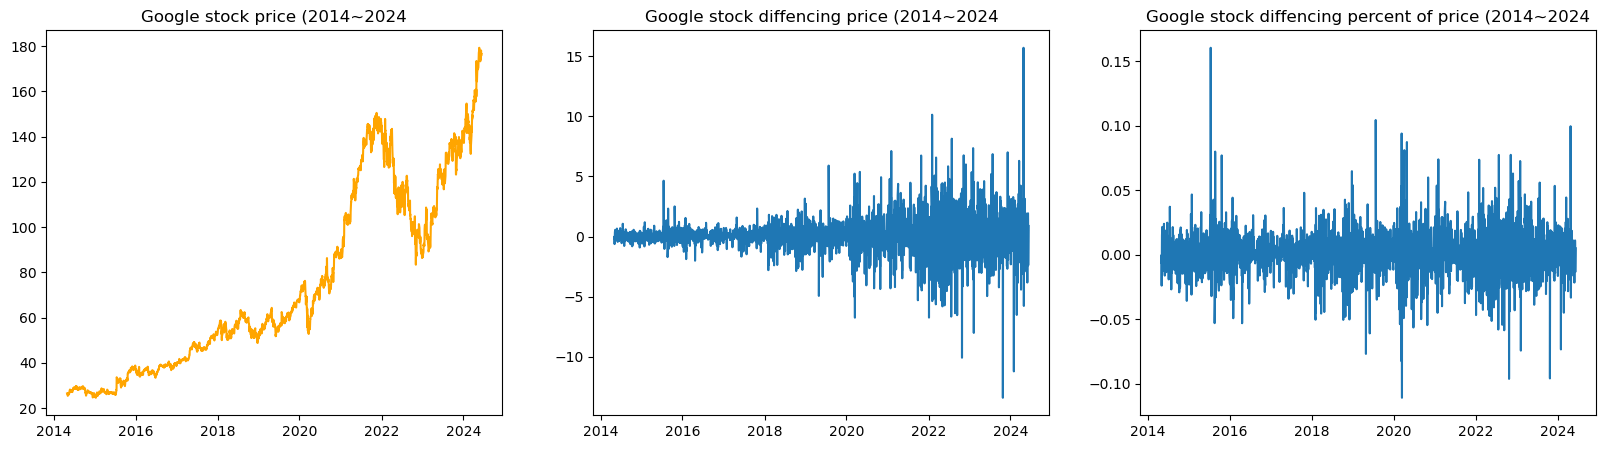

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(google_stock_df, c='orange')
plt.title('Google stock price (2014~2024')

plt.subplot(1, 3, 2)
plt.plot(google_stock_df.diff())
plt.title('Google stock diffencing price (2014~2024')

plt.subplot(1, 3, 3)
plt.plot(google_stock_df.pct_change())
plt.title('Google stock diffencing percent of price (2014~2024')

plt.show()

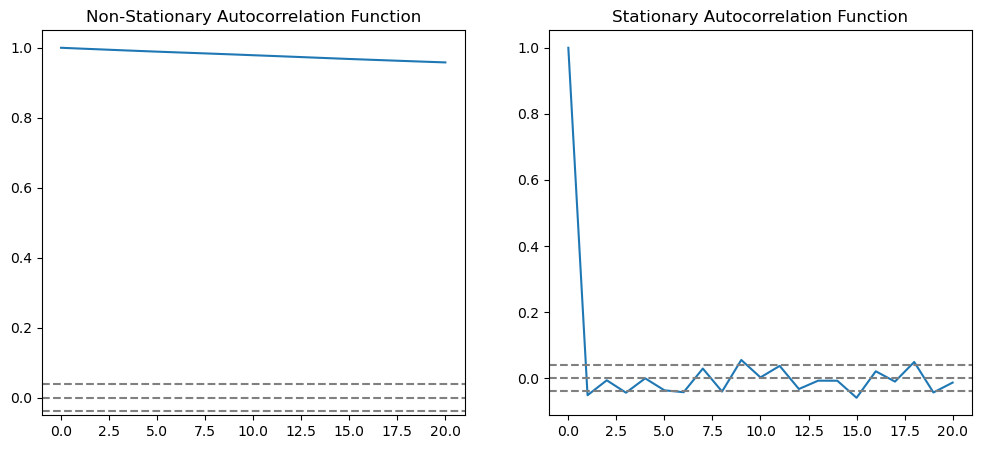

In [9]:
import numpy as np
from statsmodels.tsa.stattools import acf

google_stock_df.dropna(inplace=True)
google_stock_diff_df = google_stock_df.diff().dropna()

google_stock_acf = acf(google_stock_df, nlags=20)
google_stock_diff_acf = acf(google_stock_diff_df, nlags=20)

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(google_stock_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(google_stock_df)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(google_stock_df)), linestyle='--', color='gray')
plt.title('Non-Stationary Autocorrelation Function')

plt.subplot(122)
plt.plot(google_stock_diff_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(google_stock_diff_df)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(google_stock_diff_df)), linestyle='--', color='gray')
plt.title('Stationary Autocorrelation Function')

plt.show()

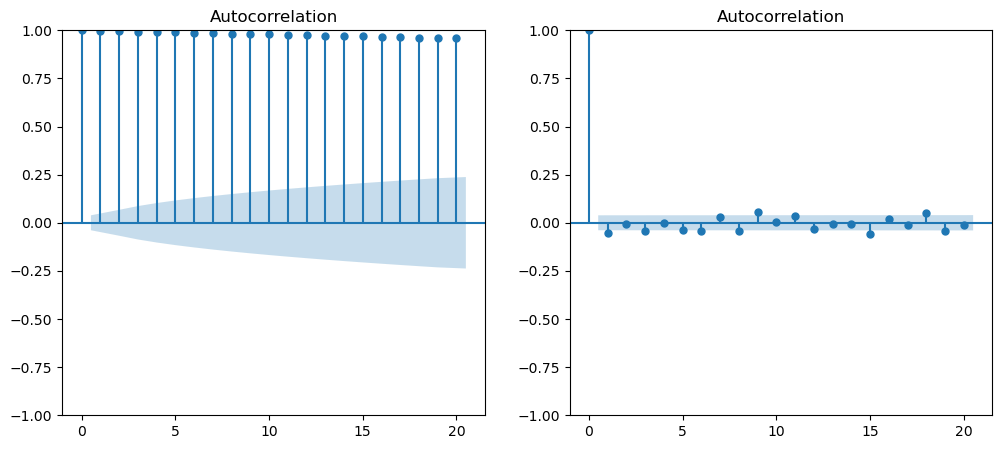

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(google_stock_df, lags=20, ax=ax[0])
plot_acf(google_stock_diff_df, lags=20, ax=ax[1])
plt.show()

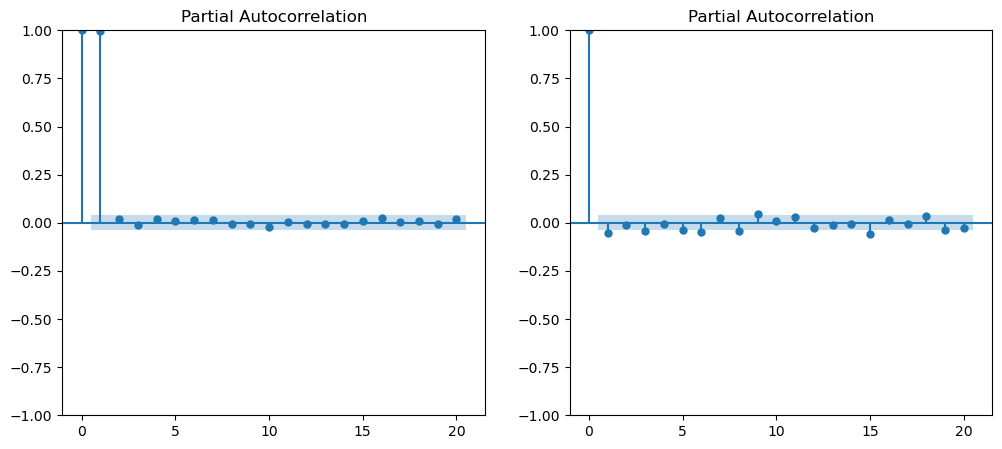

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_pacf(google_stock_df, lags=20, ax=ax[0])
plot_pacf(google_stock_diff_df, lags=20, ax=ax[1])
plt.show()

1. ACF를 먼저 해서 정상 시계열인지 비정상 시계열인지 확인 한다.
2. 정상 시계열 일 경우 PACF를 사용한다.
3. 비정상 시계열 일 경우 차분을 하여 정상성을 만들어 준 후 PACF를 사용한다.

- ACF는 누적이지만, PACF는 독립이다.
- PACF는 정상 시계열인지, 비정상 시계열인지 알 수 없다.

ACF -> 정상 시계열 -> PACF  
ACF -> 비정상 시계열 - > 차분 -> PACF